In [64]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


#imports for preprocessing and for comparing performances 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import RocCurveDisplay

# imports of  the models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier







import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


train_data=pd.read_csv("/kaggle/input/titanic/train.csv",index_col='PassengerId')

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [65]:



# Display basic information about the dataset
print(train_data.info())

# Display summary statistics of numerical features
print(train_data.describe())

# Explore unique values in categorical features
print(train_data['Embarked'].value_counts())

print(train_data['Pclass'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None
         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.00

In [66]:

print(train_data.isnull().sum())



Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [67]:

train_data_heat=train_data.drop(columns=['Cabin','Name','Ticket','Embarked','Sex'],axis=1)

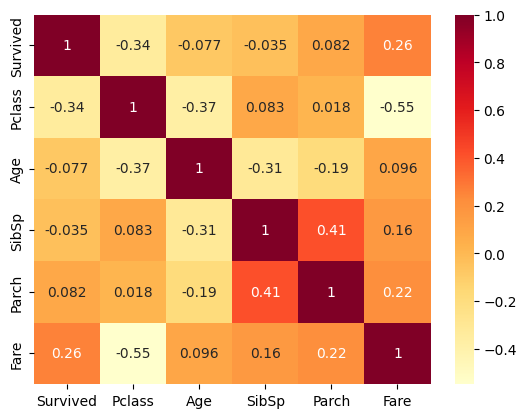

In [68]:
sns.heatmap(train_data_heat.corr(), cmap='YlOrRd',annot=True)



plt.show()

In [69]:
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [70]:
train_data_heat

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000
888,1,1,19.0,0,0,30.0000
889,0,3,NaN,1,2,23.4500


<Axes: xlabel='Pclass', ylabel='count'>

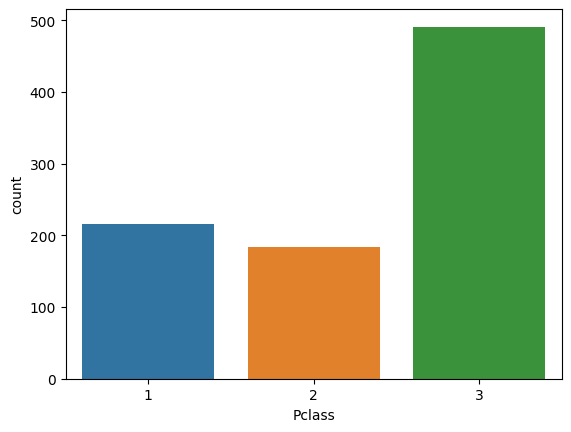

In [71]:
sns.countplot(train_data,x="Pclass")

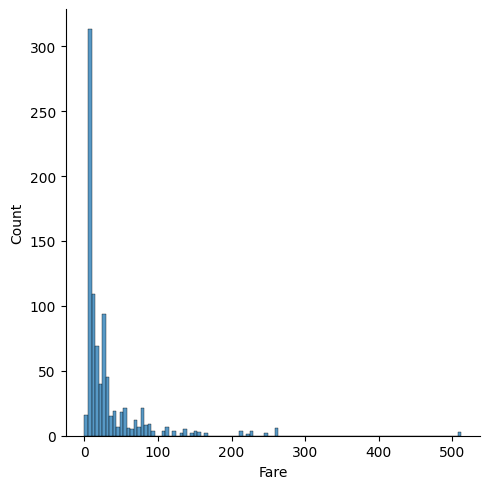

In [72]:
sns.displot(train_data['Fare'])

<Axes: ylabel='Age'>

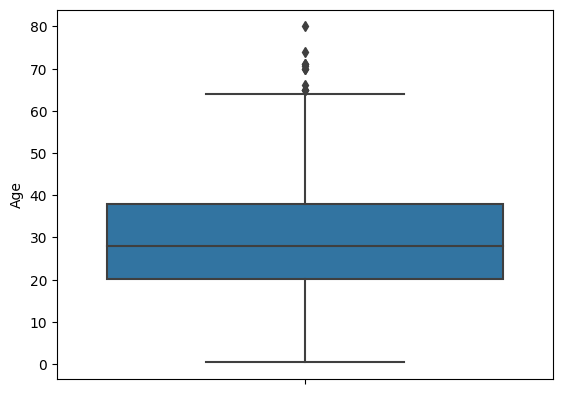

In [73]:
sns.boxplot(y=train_data['Age'])

<Axes: xlabel='Age', ylabel='Count'>

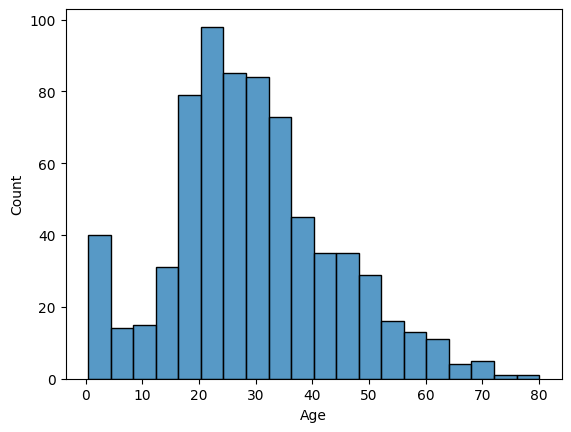

In [74]:
sns.histplot(train_data['Age'])

In [75]:
train_data['Fare']=np.log(train_data['Fare']+1)

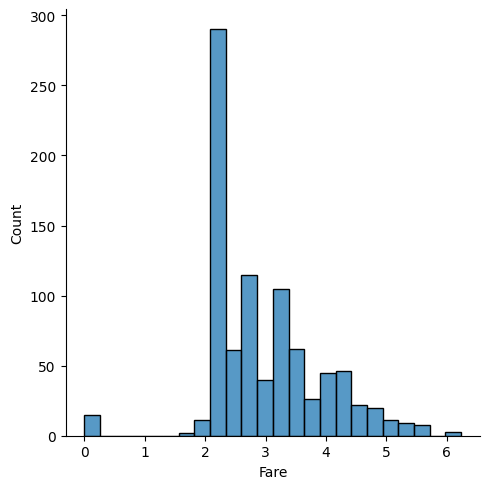

In [76]:
sns.displot(train_data['Fare'])

<Axes: xlabel='Pclass', ylabel='count'>

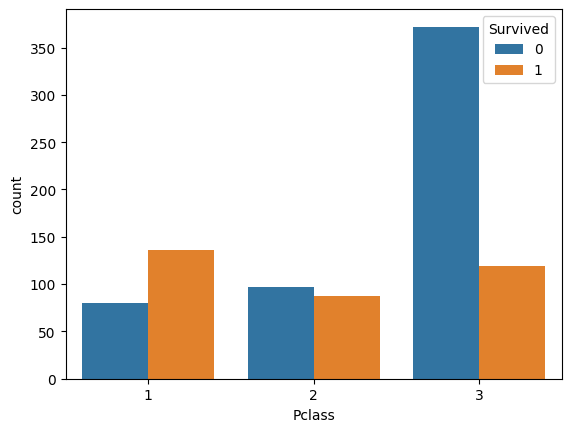

In [77]:
sns.countplot(train_data,x='Pclass',hue='Survived')

In [78]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,NaN,S


In [79]:
train_data=train_data.drop(columns=['Cabin','Name','Ticket'],axis=1)

In [80]:
train_data['Embarked'].fillna(train_data['Embarked'].mode().iloc[0], inplace=True)

In [81]:


cols=['Embarked','Sex']
le=LabelEncoder()

for col in cols :
    train_data[col]=le.fit_transform(train_data[col])
train_data.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
887,0,2,1,27.0,0,0,2.639057,2
888,1,1,0,19.0,0,0,3.433987,2
889,0,3,0,NaN,1,2,3.196630,2
890,1,1,1,26.0,0,0,3.433987,0
891,0,3,1,32.0,0,0,2.169054,1


In [82]:
train_data['Family_Size'] = train_data['SibSp'] + train_data['Parch'] + 1

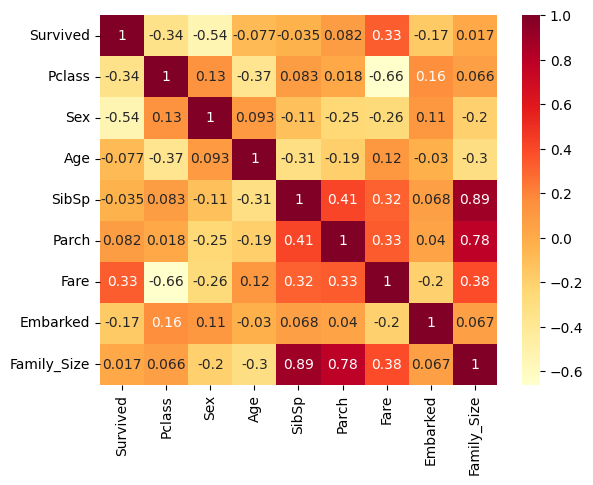

In [83]:
sns.heatmap(train_data.corr(), cmap='YlOrRd',annot=True)



plt.show()

In [84]:
train_data.isna().sum()

Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
Family_Size      0
dtype: int64

In [85]:
# Impute or drop missing values based on analysis
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

In [86]:
train_data['Embarked'].value_counts()

Embarked
2    646
0    168
1     77
Name: count, dtype: int64

In [87]:

x_train, X_temp, y_train, y_temp = train_test_split(train_data.drop('Survived',axis=1), train_data['Survived'], test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [88]:
print("old train :",x_train.shape,y_train.shape)
print("old train :",x_test.shape,y_test.shape)

old train : (623, 8) (623,)
old train : (134, 8) (134,)


In [89]:



c_values = [0.1,0.3, 0.5, 0.7, 0.9]

# Cross-validation for each k
for c in c_values:
    svm_model_test= SVC(C=c,kernel='linear',random_state=42)
    scores = cross_val_score(svm_model_test, x_train, y_train, cv=5, scoring='accuracy')
    print(f'C={c}, Mean Accuracy: {scores.mean()}, Std Dev: {scores.std()}')

C=0.1, Mean Accuracy: 0.7833548387096775, Std Dev: 0.056858046580744837
C=0.3, Mean Accuracy: 0.7849548387096774, Std Dev: 0.05938637871690092
C=0.5, Mean Accuracy: 0.7833548387096775, Std Dev: 0.056858046580744837
C=0.7, Mean Accuracy: 0.7833548387096775, Std Dev: 0.056858046580744837
C=0.9, Mean Accuracy: 0.7833548387096775, Std Dev: 0.056858046580744837


In [90]:



svm_model=SVC(C=0.7,kernel='linear',random_state=42)
svm_model.fit(x_train,y_train)

SVC(C=0.7, kernel='linear', random_state=42)

In [91]:

# Evaluate on the validation set
val_score = svm_model.score(x_val, y_val)
print(f"Validation Set Score: {val_score:.4f}")

# Evaluate on the test set
test_score = svm_model.score(x_test, y_test)
print(f"Test Set Score: {test_score:.4f}")

# Calculate and print the percentage difference
percentage_difference = abs(val_score - test_score) / max(val_score, test_score) * 100
print(f"Percentage Difference: {percentage_difference:.2f}%")


Validation Set Score: 0.8060
Test Set Score: 0.7761
Percentage Difference: 3.70%


In [116]:





svm_predictions = svm_model.predict(x_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)
svm_roc_auc = roc_auc_score(y_test, svm_predictions)




print("SVM Performance:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)
print("ROC AUC Score:", svm_roc_auc)

SVM Performance:
Accuracy: 0.7761194029850746
Precision: 0.6808510638297872
Recall: 0.6808510638297872
F1 Score: 0.6808510638297872
ROC AUC Score: 0.7542186353631696


In [93]:


# Create a subset of relevant features
relevant_features = ['Pclass', 'Fare', 'Age', 'Sex', 'SibSp', 'Parch']

# Extract features and target variable
X_subset = train_data[relevant_features]
y = train_data['Survived']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_subset)

# Explore different k values
k_values = [1, 3, 5, 7, 9]

# Cross-validation for each k
for k in k_values:
    knn_classifier_test = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_classifier_test, X_scaled, y, cv=5, scoring='accuracy')
    print(f'k={k}, Mean Accuracy: {scores.mean()}, Std Dev: {scores.std()}')

k=1, Mean Accuracy: 0.7363128491620111, Std Dev: 0.04141424320610961
k=3, Mean Accuracy: 0.7935095097608438, Std Dev: 0.0302964544083095
k=5, Mean Accuracy: 0.8181972255351203, Std Dev: 0.030587174076709668
k=7, Mean Accuracy: 0.8181846713953927, Std Dev: 0.02175919808094143
k=9, Mean Accuracy: 0.8114682066411399, Std Dev: 0.015452725822446927


In [94]:
#x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,train_size=0.8,test_size=0.2,random_state=42)

x_train_scaled, X_temp_scaled, y_train_scaled, y_temp_scaled = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
x_val_scaled, x_test_scaled, y_val_scaled, y_test_scaled = train_test_split(X_temp_scaled, y_temp_scaled, test_size=0.5, random_state=42)

In [95]:


# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=9,p=1)

# Train the KNN classifier
knn_classifier.fit(x_train_scaled, y_train_scaled)

KNeighborsClassifier(n_neighbors=9, p=1)

In [98]:

# Evaluate on the validation set
val_score = knn_classifier.score(x_val_scaled, y_val_scaled)
print(f"Validation Set Score: {val_score:.4f}")

# Evaluate on the test set
test_score = knn_classifier.score(x_test_scaled, y_test_scaled)
print(f"Test Set Score: {test_score:.4f}")

# Calculate and print the percentage difference
percentage_difference = abs(val_score - test_score) / max(val_score, test_score) * 100
print(f"Percentage Difference: {percentage_difference:.2f}%")

Validation Set Score: 0.8060
Test Set Score: 0.7836
Percentage Difference: 2.78%


In [99]:
knn_predictions = knn_classifier.predict(x_test_scaled)
knn_accuracy = accuracy_score(y_test_scaled, knn_predictions)
knn_precision = precision_score(y_test_scaled, knn_predictions)
knn_recall = recall_score(y_test_scaled, knn_predictions)
knn_f1 = f1_score(y_test_scaled, knn_predictions)
knn_roc_auc = roc_auc_score(y_test_scaled, knn_predictions)


print("\nK-Nearest Neighbors (KNN) Performance:")
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1 Score:", knn_f1)
print("ROC AUC Score:", knn_roc_auc)


K-Nearest Neighbors (KNN) Performance:
Accuracy: 0.7835820895522388
Precision: 0.7045454545454546
Recall: 0.6595744680851063
F1 Score: 0.6813186813186813
ROC AUC Score: 0.7550745903643922


In [100]:
for smoothing_value in [1e-9, 1e-8, 1e-7, 1e-6, 1e-5,1e-4, 1e-3, 1e-2,1e-1]:
    # Create a Gaussian Naive Bayes model with the current smoothing value
    gnb_test = GaussianNB(var_smoothing=smoothing_value)

    # Train the model
    gnb_test.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred = gnb_test.predict(x_test)

    # Evaluate the model and print results
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy (var_smoothing={smoothing_value}): {accuracy}")


Accuracy (var_smoothing=1e-09): 0.7388059701492538

Accuracy (var_smoothing=1e-08): 0.7388059701492538

Accuracy (var_smoothing=1e-07): 0.7388059701492538

Accuracy (var_smoothing=1e-06): 0.7388059701492538

Accuracy (var_smoothing=1e-05): 0.7388059701492538

Accuracy (var_smoothing=0.0001): 0.7388059701492538

Accuracy (var_smoothing=0.001): 0.7313432835820896

Accuracy (var_smoothing=0.01): 0.7611940298507462

Accuracy (var_smoothing=0.1): 0.6343283582089553


In [101]:



gnb = GaussianNB(var_smoothing=1e-2)

gnb.fit(x_train, y_train)






GaussianNB(var_smoothing=0.01)

In [102]:

# Evaluate on the validation set
val_score = gnb.score(x_val, y_val)
print(f"Validation Set Score: {val_score:.4f}")

# Evaluate on the test set
test_score = gnb.score(x_test, y_test)
print(f"Test Set Score: {test_score:.4f}")

# Calculate and print the percentage difference
percentage_difference = abs(val_score - test_score) / max(val_score, test_score) * 100
print(f"Percentage Difference: {percentage_difference:.2f}%")

Validation Set Score: 0.6791
Test Set Score: 0.7612
Percentage Difference: 10.78%


In [103]:

y_pred = gnb.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.7611940298507462
Confusion Matrix:
[[74 13]
 [19 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        87
           1       0.68      0.60      0.64        47

    accuracy                           0.76       134
   macro avg       0.74      0.72      0.73       134
weighted avg       0.76      0.76      0.76       134



In [104]:
gnb_accuracy = accuracy_score(y_test, y_pred)
gnb_precision = precision_score(y_test, y_pred)
gnb_recall = recall_score(y_test, y_pred)
gnb_f1 = f1_score(y_test, y_pred)

gnb_roc_auc = roc_auc_score(y_test, y_pred)

# Print the results
print("\nGaussian Naive Bayes Performance:")
print("Accuracy:", gnb_accuracy)
print("Precision:", gnb_precision)
print("Recall:", gnb_recall)
print("F1 Score:", gnb_f1)
print("ROC AUC Score:", gnb_roc_auc)


Gaussian Naive Bayes Performance:
Accuracy: 0.7611940298507462
Precision: 0.6829268292682927
Recall: 0.5957446808510638
F1 Score: 0.6363636363636364
ROC AUC Score: 0.723159696747371


In [105]:


# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
}

# Create the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)


print("All Combinations and Accuracy:")
for params, accuracy in zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score']):
    print(f"Hyperparameters: {params}, Accuracy: {accuracy}")

# Print the best hyperparameter values and corresponding accuracy
print("Best Hyperparameter Values:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

All Combinations and Accuracy:
Hyperparameters: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}, Accuracy: 0.7158967741935485
Hyperparameters: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}, Accuracy: 0.7158967741935485
Hyperparameters: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}, Accuracy: 0.7158967741935485
Hyperparameters: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}, Accuracy: 0.7158967741935485
Hyperparameters: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}, Accuracy: 0.7158967741935485
Hyperparameters: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}, Accuracy: 0.7158967741935485
Hyperparameters: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}, Accuracy: 0.7158967741935485
Hyperparameters: {'max

In [106]:

decision_tree_classifier = DecisionTreeClassifier(random_state=42,max_depth= 5, max_features='log2', min_samples_leaf= 2, min_samples_split= 2)
decision_tree_classifier.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=5, max_features='log2', min_samples_leaf=2,
                       random_state=42)

In [107]:

# Evaluate on the validation set
val_score = decision_tree_classifier.score(x_val, y_val)
print(f"Validation Set Score: {val_score:.4f}")

# Evaluate on the test set
test_score = decision_tree_classifier.score(x_test, y_test)
print(f"Test Set Score: {test_score:.4f}")

# Calculate and print the percentage difference
percentage_difference = abs(val_score - test_score) / max(val_score, test_score) * 100
print(f"Percentage Difference: {percentage_difference:.2f}%")

Validation Set Score: 0.8358
Test Set Score: 0.8209
Percentage Difference: 1.79%


In [108]:
decision_tree_predictions = decision_tree_classifier.predict(x_test)

#'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2

dtp_accuracy = accuracy_score(y_test, decision_tree_predictions)
dtp_precision = precision_score(y_test, decision_tree_predictions)
dtp_recall = recall_score(y_test,decision_tree_predictions)
dtp_f1 = f1_score(y_test, decision_tree_predictions)

dtp_roc_auc = roc_auc_score(y_test,decision_tree_predictions)

# Print the results
print("\nDecision_tree Performance:")
print("Accuracy:", dtp_accuracy)
print("Precision:", dtp_precision)
print("Recall:", dtp_recall)
print("F1 Score:", dtp_f1)
print("ROC AUC Score:", dtp_roc_auc)


Decision_tree Performance:
Accuracy: 0.8208955223880597
Precision: 0.8484848484848485
Recall: 0.5957446808510638
F1 Score: 0.7
ROC AUC Score: 0.7691367082416238


In [109]:

param_grid = {
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

# Create the MLPClassifier
mlp = MLPClassifier(max_iter=2000,random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Access all combinations and their results
results = grid_search.cv_results_

# Print all combinations and their results
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Mean Accuracy: {mean_score:.4f} | Parameters: {params}")

# Print the best hyperparameters
print("\nBest Hyperparameters:")
print(grid_search.best_params_)

# Predict using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Mean Accuracy: 0.8186 | Parameters: {'learning_rate': 'constant', 'solver': 'adam'}
Mean Accuracy: 0.8218 | Parameters: {'learning_rate': 'constant', 'solver': 'sgd'}
Mean Accuracy: 0.8186 | Parameters: {'learning_rate': 'invscaling', 'solver': 'adam'}
Mean Accuracy: 0.6243 | Parameters: {'learning_rate': 'invscaling', 'solver': 'sgd'}
Mean Accuracy: 0.8186 | Parameters: {'learning_rate': 'adaptive', 'solver': 'adam'}
Mean Accuracy: 0.8137 | Parameters: {'learning_rate': 'adaptive', 'solver': 'sgd'}

Best Hyperparameters:
{'learning_rate': 'constant', 'solver': 'sgd'}
Test Accuracy: 0.8059701492537313


In [110]:
param_grid = {
    'max_iter': [200 ,500,1000,1500,2000],
    'learning_rate': ['constant'],
    'solver': ['sgd']
}

# Create the MLPClassifier
mlp = MLPClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Access all combinations and their results
results = grid_search.cv_results_

# Print all combinations and their results
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Mean Accuracy: {mean_score:.4f} | Parameters: {params}")

# Print the best hyperparameters
print("\nBest Hyperparameters:")
print(grid_search.best_params_)

# Predict using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

Mean Accuracy: 0.7687 | Parameters: {'learning_rate': 'constant', 'max_iter': 200, 'solver': 'sgd'}
Mean Accuracy: 0.8218 | Parameters: {'learning_rate': 'constant', 'max_iter': 500, 'solver': 'sgd'}
Mean Accuracy: 0.8218 | Parameters: {'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'sgd'}
Mean Accuracy: 0.8218 | Parameters: {'learning_rate': 'constant', 'max_iter': 1500, 'solver': 'sgd'}
Mean Accuracy: 0.8218 | Parameters: {'learning_rate': 'constant', 'max_iter': 2000, 'solver': 'sgd'}

Best Hyperparameters:
{'learning_rate': 'constant', 'max_iter': 500, 'solver': 'sgd'}
Test Accuracy: 0.8059701492537313


In [111]:

mlp_classifier = MLPClassifier(learning_rate='constant', solver='sgd',random_state=42,max_iter= 500)
mlp_classifier.fit(x_train, y_train)


MLPClassifier(max_iter=500, random_state=42, solver='sgd')

In [112]:

# Example for MLP
mlp_predictions = mlp_classifier.predict(x_test)
print("MLP Metrics:")
print(classification_report(y_test, mlp_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, mlp_predictions))
print("ROC AUC Score:", roc_auc_score(y_test, mlp_predictions))


MLP Metrics:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86        87
           1       0.82      0.57      0.68        47

    accuracy                           0.81       134
   macro avg       0.81      0.75      0.77       134
weighted avg       0.81      0.81      0.80       134

Confusion Matrix:
[[81  6]
 [20 27]]
ROC AUC Score: 0.7527512839325018


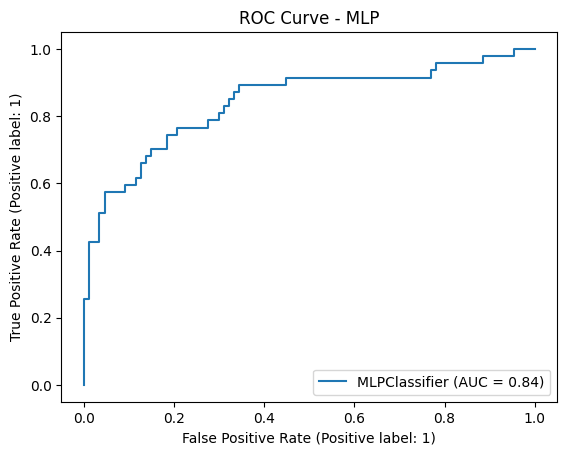

In [113]:

# Example for MLP
disp = RocCurveDisplay.from_estimator(mlp_classifier, x_test, y_test)
plt.title('ROC Curve - MLP')
plt.show()

In [114]:
# Assuming you have already trained your MLP classifier (mlp_classifier) and have validation data (x_val, y_val) and test data (x_test, y_test)

# Evaluate on the validation set
val_score = mlp_classifier.score(x_val, y_val)
print(f"Validation Set Score: {val_score:.4f}")

# Evaluate on the test set
test_score = mlp_classifier.score(x_test, y_test)
print(f"Test Set Score: {test_score:.4f}")

# Calculate and print the percentage difference
percentage_difference = abs(val_score - test_score) / max(val_score, test_score) * 100
print(f"Percentage Difference: {percentage_difference:.2f}%")


Validation Set Score: 0.7537
Test Set Score: 0.8060
Percentage Difference: 6.48%


In [115]:
mlp_classifier_predictions = mlp_classifier.predict(x_test)

#'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2

mlp_accuracy = accuracy_score(y_test, mlp_classifier_predictions)
mlp_precision = precision_score(y_test, mlp_classifier_predictions)
mlp_recall = recall_score(y_test,mlp_classifier_predictions)
mlp_f1 = f1_score(y_test, mlp_classifier_predictions)

mlp_roc_auc = roc_auc_score(y_test,mlp_classifier_predictions)

# Print the results
print("\nMulti-Layer Perceptron Performance:")
print("Accuracy:", mlp_accuracy)
print("Precision:", mlp_precision)
print("Recall:", mlp_recall)
print("F1 Score:",mlp_f1)
print("ROC AUC Score:", mlp_roc_auc)



Multi-Layer Perceptron Performance:
Accuracy: 0.8059701492537313
Precision: 0.8181818181818182
Recall: 0.574468085106383
F1 Score: 0.675
ROC AUC Score: 0.7527512839325018
